# 10 - Newton's Method Example Exercise

### Non-linear solution with Newton's method
Newton's method is a numerical method for solving non-linear equations.  It is an iterative method that uses the derivative of the function to find the root.  The derivative of the function is used to find the tangent line to the function at the current point.  The tangent line is then used to find the next point where the tangent line crosses the x-axis.  This process is repeated until the solution is found.

#### Derivation of Newton's method
First use the Taylor series expansion of the function $f(x)$ about the point $x_0$:

$$
\begin{equation}
f(x) = f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)}{2!}(x-x_0)^2 + \frac{f'''(x_0)}{3!}(x-x_0)^3 + \cdots
\end{equation}
$$

where $f'$ is the 1st derivative of x and $f''$ is the second derivative and so on. If we neglect the higher order terms, we can write:

$$
\begin{equation}
f(x) \approx f(x_0) + f'(x_0)(x-x_0)
\end{equation}
$$

If we set $f(x) = 0$ and solve for $x$, we get:

$$
\begin{equation}
x = x_0 - \frac{f(x_0)}{f'(x_0)}
\end{equation}
$$

This is the Newton's method equation for finding the root of a function. $x_0$ is the initial guess and $x$ is the new guess. Iterations are completed until the value of x is close enough to zero. The derivative of the function is used as an estimate for the next guess according to the above. This is a first order approximation as a the first derivative is used. There are other numerical methods for root finding.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

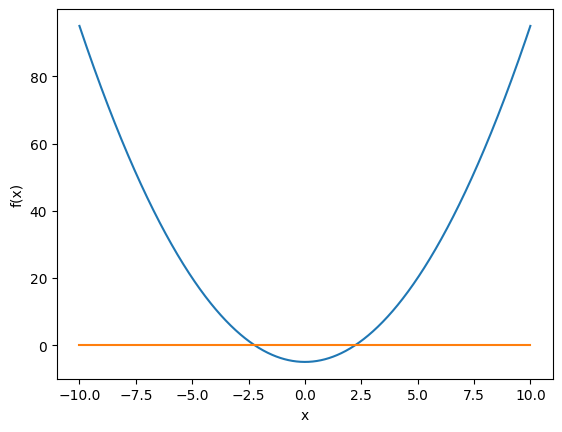

In [53]:
f = lambda x: x**2 -5
x = np.linspace(-10,10,1000)
plt.plot(x, f(x))
plt.plot(x,np.zeros(len(x)))
plt.xlabel('x'); plt.ylabel('f(x)')
plt.show()

We need to find the roots of the above equation.

In [54]:
def newton(x):
   fprime = 2*x
   return x - f(x)/fprime

In [55]:
newton(-10)

-5.25

In [56]:
newton(-5.25)

-3.1011904761904763

In [57]:
newton(-3.101)

-2.356691551112544

In [58]:
newton(-2.357)

-2.2391703436571913

In [59]:
newton(-2.239)

-2.2360698972755695

In [60]:
newton(-2.236)

-2.236067978533095

In [61]:
-np.sqrt(5)

-2.23606797749979

Lets plot our progression from our initial guess of $x_0=-10$

In [62]:
#first make an array of our point progression
xvals = np.array([-10,-5.25,-3.101,-2.357,-2.239,-2.236]) #convert list to array
yvals = f(xvals)

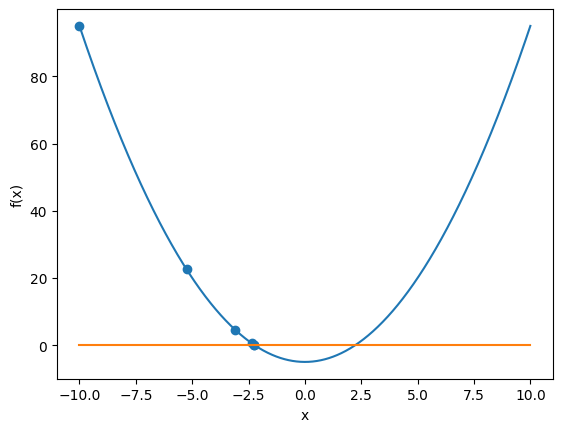

In [63]:
plt.plot(x, f(x))
plt.plot(x,np.zeros(len(x)))
plt.scatter(xvals,yvals)
plt.xlabel('x'); plt.ylabel('f(x)')
plt.show()

Now lets try a more complex equation (still everywhere differentiable)

In [64]:
f2 = lambda x: x**5 - 5*x**4 + x**3 + x**2 + x + 190

(-100.0, 300.0)

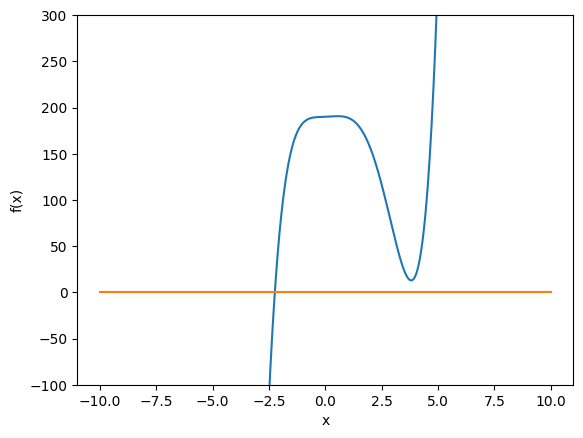

In [65]:
plt.plot(x,f2(x))
plt.plot(x,np.zeros(len(x)))
plt.xlabel('x'); plt.ylabel('f(x)')
plt.ylim(-100,300)

In [66]:
#define our new newton's method with the derivative
def newton2(x):
  fprime = 5*x**4 - 20*x**3 + 3*x**2 + 2*x + 1
  return x - f2(x)/fprime

In [67]:
#Our initial guess
newton2(5.5)

4.870887130362349

In [68]:
newton2(4.870887)

4.424011563368115

In [69]:
newton2(4.424011)

4.106934926714884

In [70]:
newton2(4.1069349)

3.836682141049953

In [71]:
newton2(3.83668)

1.9062611179657791

In [72]:
newton2(1.906)

4.752313888527454

In [73]:
newton2(4.75)

4.339199843776698

Let's plot our points again:

In [74]:
xvals = np.array([5.5,4.87,4.42,4.106,3.83,1.906,4.75,4.34])
yvals = f2(xvals)

(-100.0, 300.0)

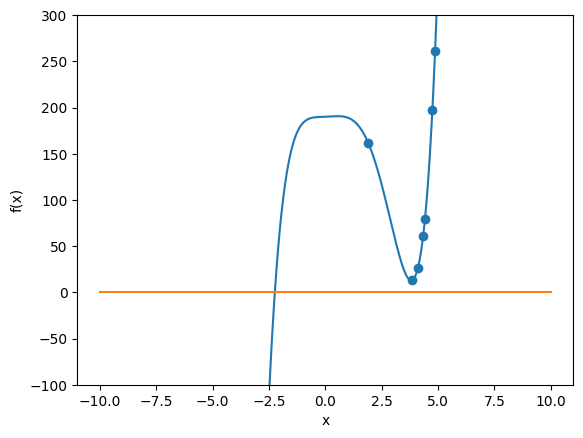

In [75]:
plt.plot(x,f2(x))
plt.plot(x,np.zeros(len(x)))
plt.scatter(xvals,yvals)
plt.xlabel('x'); plt.ylabel('f(x)')
plt.ylim(-100,300)

You can see that a proper guess value is important in finding the root with derivative based root finding methods.

Instead of x's and y's, lets us an application example: the Colbrook equation.

In [76]:
def Colbrook(f,Rey,Dia,ep):
    return 1/np.sqrt(f) + 2*np.log10(2.51/(Rey*np.sqrt(f))+ep/(3.71*Dia))

(-10.0, 10.0)

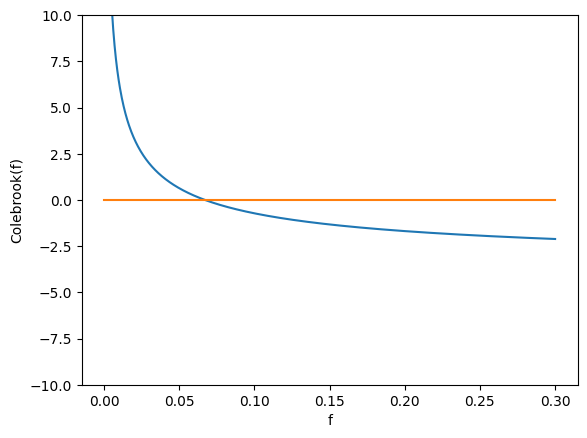

In [77]:
#now lets plot the function
Re = 5000; epsil = 0.004; D = 0.11
xs = np.linspace(0.0001,0.30,1000)
plt.plot(xs,Colbrook(xs,Re,D,epsil))
plt.plot(xs,np.zeros(len(xs)))
plt.xlabel('f'); plt.ylabel('Colebrook(f)')
plt.ylim(-10,10)

Now lets setup our Newton's method to find the friction factor at those conditions.

There are several ways to get that Colbrook_prime function in the above code snippet. It's the derivative with respect to the friction factor of the Colbrook equation. You can do it by hand and then type in the equation. You could also use the symbolic derivative function in sympy to get the derivative. Or you can use the derivative function in scipy.  Several methods are shown below.

In [78]:
#using scipy to get the derivative of the Colbrook equation
from scipy.misc import derivative
def Colbrook_prime2(f,Re,D,epsil):
    return derivative(Colbrook,f,dx=1e-6,args=(Re,D,epsil))

In [79]:
#Find the derivative of the Colbrook equation with SymPy
import sympy as sym
ff,Reyn,Diam,eps = sym.symbols('ff,Reyn,Diam,eps')
#display the symbolic equation
#sym.init_printing()
sym.diff(1/sym.sqrt(ff) + 2*sym.log(2.51/(Reyn*sym.sqrt(ff))+eps/(3.71*Diam),10),ff) #the 10 is the base of the log


-1/(2*ff**(3/2)) - 2.51/(Reyn*ff**(3/2)*(2.51/(Reyn*sqrt(ff)) + 0.269541778975741*eps/Diam)*log(10))

In [80]:
def Colbrook_prime(f,Re,D,epsil):
    return -1/(2*f**(3/2)) - 2.51/(np.log(10)*Re*f**(3/2)*(0.2695*epsil/D+2.51/(Re*np.sqrt(f))))

In [81]:
def newt(f):
    return f - Colbrook(f,Re,D,epsil)/Colbrook_prime(f,Re,D,epsil)

In [82]:
newt(0.2)

-0.09022367308759105

In [83]:
newt(-0.090)

/var/folders/6d/1jr2w1qx1rnd2nkndlq4hc700000gn/T/ipykernel_57416/3040087786.py:2: RuntimeWarning: invalid value encountered in sqrt
  return 1/np.sqrt(f) + 2*np.log10(2.51/(Rey*np.sqrt(f))+ep/(3.71*Dia))
/var/folders/6d/1jr2w1qx1rnd2nkndlq4hc700000gn/T/ipykernel_57416/837614916.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return -1/(2*f**(3/2)) - 2.51/(np.log(10)*Re*f**(3/2)*(0.2695*epsil/D+2.51/(Re*np.sqrt(f))))


(nan+nanj)

In [84]:
newt(0.1)

0.05585303773902183

In [85]:
newt(0.05585)

0.06563953943684912

In [86]:
newt(0.065639)

0.0670681189201254

In [87]:
newt(0.06707)

0.06709175234208192

In [88]:
newt(0.067092)

0.06709175772521607

Isn't there a better way of doing this than having to type this in over and over. Let's modify the Newton function to do the interation for us.

In [89]:
Re = 5000; epsil = 0.004; D = 0.11
def NewtonC(x):
  values = []
  for i in range(0,50):
    values.append(x)
    xnew = x - Colbrook(x,Re,D,epsil)/Colbrook_prime(x,Re,D,epsil)*0.25
    x = xnew
  return values

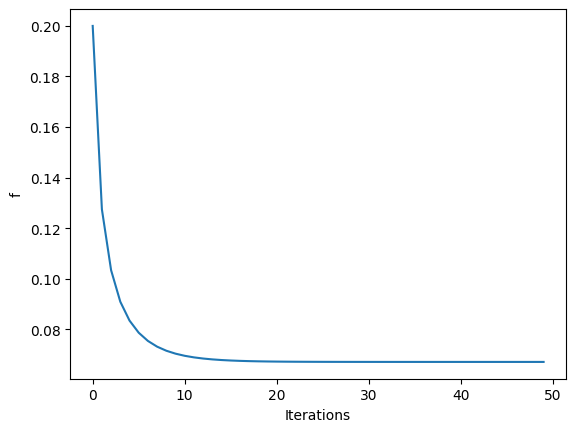

In [90]:
plt.plot(NewtonC(0.2))
plt.xlabel('Iterations'); plt.ylabel('f')
plt.show()

In [91]:
#check if near zero
Colbrook(NewtonC(0.2)[-1],Re,D,epsil)

-9.349525358359756e-07

In [92]:
def xnext(x):
  return x - Colbrook(x,Re,D,epsil)/Colbrook_prime(x,Re,D,epsil)*0.25

def Newton(x):
  xnew = xnext(x)
  while abs(xnew - x)>1e-6:
    x = xnew
    xnew = xnext(x)
  return xnew

In [93]:
Newton(0.2)

0.06709410233779416

Check answer against fsolve

In [94]:
from scipy.optimize import fsolve
fsolve(Colbrook,0.05,args=(Re,D,epsil))

array([0.06709176])

Below is another example of using Newton's method to solve a non-linear system of equations where the derivatives of each equation with respect to each variable are known and defined in the Jacobian matrix.  A more in-depth class on numerical mehods would explain more.

In [95]:
# Define the system of equations
def equations(x):
    eq1 = x[0]**2 + x[1] - 4
    eq2 = x[0] - x[1]**2 - 1
    return [eq1, eq2]

# Define the Jacobian matrix (partial derivatives with respect to x1 and x2)
def jacobian(x):
    jac = np.array([[2*x[0], 1],
                    [1, -2*x[1]]])
    return jac

# Solve the system of equations using Newton's method
def newton_method(equations, jacobian, x0, tolerance=1e-6, max_iterations=100):
    x = x0
    for i in range(max_iterations):
        f = equations(x)
        J = jacobian(x)
        delta_x = np.linalg.solve(J, -np.array(f))
        x += delta_x
        if np.linalg.norm(delta_x) < tolerance:
            break
    return x

# Initial guess
x0 = np.array([1.0, 1.0])

# Solve the system of equations
solution = newton_method(equations, jacobian, x0)

print(f"Solution:{solution}")

Solution:[1.76746906 0.87605312]
